### International Monetary Fund API

In [1]:
import requests

In [2]:
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'CompactData/IFS/M.GB.PCPI_IX' # adjust as needed
data = requests.get('{}{}'.format(url,key)).json()
data['CompactData']['DataSet']['Series']['Obs'][-1]

{u'@OBS_VALUE': u'115.522750479949', u'@TIME_PERIOD': u'2017-06'}

In [3]:
import pandas as pd
df = pd.DataFrame(data['CompactData']['DataSet']['Series']['Obs'])
df = df.set_index(pd.to_datetime(df['@TIME_PERIOD']))
df['inflation'] = df['@OBS_VALUE'].astype(float).pct_change(12) * 100

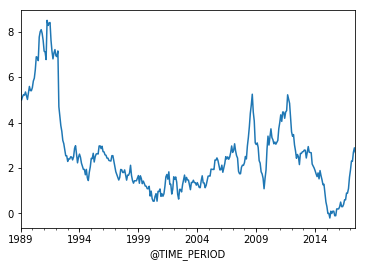

In [4]:
%matplotlib inline
df['inflation'].dropna().plot()

In [5]:
data

{u'CompactData': {u'@xmlns': u'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
  u'@xmlns:xsd': u'http://www.w3.org/2001/XMLSchema',
  u'@xmlns:xsi': u'http://www.w3.org/2001/XMLSchema-instance',
  u'@xsi:schemaLocation': u'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message https://registry.sdmx.org/schemas/v2_0/SDMXMessage.xsd http://dataservices.imf.org/compact/IFS http://dataservices.imf.org/compact/IFS.xsd',
  u'DataSet': {u'@xmlns': u'http://dataservices.imf.org/compact/IFS',
   u'Series': {u'@FREQ': u'M',
    u'@INDICATOR': u'PCPI_IX',
    u'@REF_AREA': u'GB',
    u'@TIME_FORMAT': u'P1M',
    u'@UNIT_MULT': u'0',
    u'Obs': [{u'@OBS_VALUE': u'54.0729416903254', u'@TIME_PERIOD': u'1988-01'},
     {u'@OBS_VALUE': u'54.2476523258353', u'@TIME_PERIOD': u'1988-02'},
     {u'@OBS_VALUE': u'54.4223629613453', u'@TIME_PERIOD': u'1988-03'},
     {u'@OBS_VALUE': u'55.121205503385', u'@TIME_PERIOD': u'1988-04'},
     {u'@OBS_VALUE': u'55.3832714566499', u'@TIME_PERIOD': 